<font color=red>

<b>NETFLIX-DATA EXPLORATION AND VISUALISATION</b>






<font color=blue>
Netflix is widely recognized as a leading media and video streaming platform, renowned for its extensive library of over 10,000 movies and TV shows. As of mid-2021, Netflix boasts a staggering global subscriber base of over 222 million. The dataset in question comprises a tabular format that encompasses comprehensive listings of all the movies and TV shows accessible on the platform. It encompasses a wealth of details including cast members, directors, ratings, release years, durations, and more.
</font color=blue>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Use the read_csv function to read the dataset from the specified file path.
#Let’s import and view the first five rows using the head() function.

In [3]:
#Reading dataset
df=pd.read_csv("Netflix case study dataset.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Observations on the shape of data, data types of all the attributes and exploring the data

In [4]:
#Checking the number of rows and columns
df.shape

(8807, 12)

In [5]:
#To list the names of columns present
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
#To check the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# BASIC ANALYSIS OF DATASET

In [12]:
#Checking the null value 
df1.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           0
listed_in          0
description        0
dtype: int64

In [13]:
df1=df1[df1.isnull().any(axis=1)]

<Axes: >

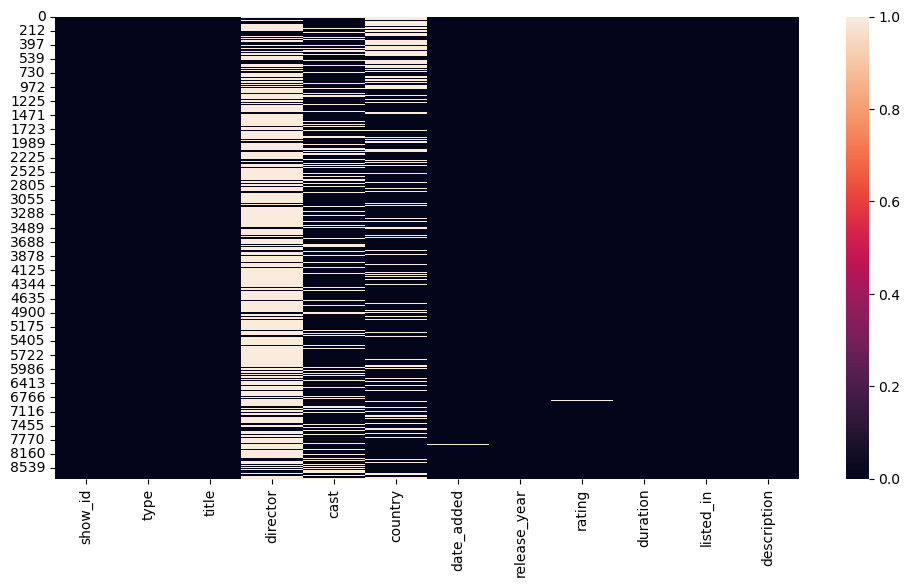

In [14]:
#Heatmap showing null values

plt.figure(figsize=[12,6])
sns.heatmap(df1.isnull())

<font color =red >
<b> OBSERVATION : NULL VALUES ARE PRESENT IN director,cast,country,date_added,rating,duration COLUMNS
</font>

## 1. Drop NaN Values & handling null values

In [21]:
df1=df
df1=df.dropna(subset=["rating"])
df1=df.dropna(subset=["duration"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      6170 non-null   object
 4   cast          7979 non-null   object
 5   country       7973 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8804 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.2+ KB


In [22]:
df_null=df1[["country","cast","director"]].isna()
df_null=df_null[(df_null["country"]==True) & (df_null["cast"]==True) & (df_null["director"]==True)]
index_to_drop=df_null.index
index_to_drop

Int64Index([   3,   10,   14,   74,  123,  147,  181,  218,  224,  234,  242,
             320,  368,  369,  379,  404,  430,  465,  466,  490,  497,  549,
             641,  653,  710,  738,  761,  842,  851,  852,  854,  925,  936,
             957, 1005, 1038, 1056, 1094, 1095, 1116, 1224, 1225, 1723, 1828,
            1889, 1890, 1952, 2101, 2152, 2222, 2236, 2335, 2394, 2425, 2432,
            2495, 2568, 2569, 2699, 2893, 2982, 3393, 3394, 3395, 3396, 3397,
            3469, 3539, 3592, 3789, 3837, 3953, 3987, 4015, 4056, 4199, 4250,
            4372, 4627, 4637, 4654, 5291, 5799, 5870, 6389, 6618, 7017, 7222,
            7438, 7483, 7624, 7812, 8109, 8199, 8609, 8803],
           dtype='int64')

In [23]:
df1=df1.drop(index=index_to_drop)
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# IMPUTATION OF DATE_ADDED

In [24]:
df1["date_added"]=df1["date_added"].fillna(df1["release_year"])
df1["date_added"].isna().sum()

0

# IMPUTATION OF DIRECTORS

In [25]:
director_fill=df1.groupby(["type","listed_in","country"])["director"].apply(lambda x:x.mode()) #filling the data with value that appears most
director_fill=director_fill.reset_index()
director_fill

,type,listed_in,country,level_3,director
0,Movie,Action & Adventure,"Australia, United States",0,Simon Wincer
1,Movie,Action & Adventure,"Bulgaria, United States",0,Todor Chapkanov
2,Movie,Action & Adventure,Canada,0,Adam Alleca
3,Movie,Action & Adventure,Canada,1,Allan Ungar
4,Movie,Action & Adventure,Canada,2,Brett Donowho
...,...,...,...,...,...
3196,TV Show,TV Shows,Japan,0,"Kobun Shizuno, Hiroyuki Seshita"
3197,TV Show,TV Shows,Saudi Arabia,0,"Ali Kalthami, Meshal Aljaser, Faris Godus, Moh..."
3198,TV Show,TV Shows,United States,0,"Joe Berlinger, Bruce Sinofsky"
3199,TV Show,TV Shows,United States,1,"Oscar Micheaux, Spencer Williams, Richard E. N..."


In [26]:
df1=df1.merge(director_fill,on=["type","listed_in","country"],how="left")
df1["director"]=np.where(df1["director_x"].isna(),df1["director_y"],df1["director_x"])
df1=df1[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df1=df1.drop_duplicates(subset="show_id")
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [27]:
df2=df1.merge(director_fill[["type","listed_in","director"]],on=["type","listed_in"],how="left")
df2["director"]=np.where(df2["director_x"].isna(),df2["director_y"],df2["director_x"])
df2=df2[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df2=df2.drop_duplicates(subset="show_id")
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
48,s2,TV Show,Blood & Water,Michel Tikhomiroff,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
52,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
54,s5,TV Show,Kota Factory,BB Sasore,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
60,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
357635,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
357749,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
357750,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
357754,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [28]:
df3=df2.merge(director_fill[["type","director"]],on=["type"],how="left")
df3["director"]=np.where(df3["director_x"].isna(),df3["director_y"],df3["director_x"])
df3=df3[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df3=df3.drop_duplicates(subset="show_id")

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 0 to 18971439
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8708 non-null   object
 1   type          8708 non-null   object
 2   title         8708 non-null   object
 3   director      8708 non-null   object
 4   cast          7979 non-null   object
 5   country       7973 non-null   object
 6   date_added    8708 non-null   object
 7   release_year  8708 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8708 non-null   object
 10  listed_in     8708 non-null   object
 11  description   8708 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.4+ KB


# IMPUTATION OF COUNTRY

In [29]:
country_fill=df1.groupby(["cast","director"])["country"].apply(lambda x:x.mode())
country_fill=country_fill.reset_index()
country_fill

,cast,director,level_2,country
0,"50 Cent, Ryan Phillippe, Bruce Willis, Rory Ma...",Mike Gunther,0,United States
1,"A.J. LoCascio, Sendhil Ramamurthy, Fred Tatasc...",Michael D. Black,0,United States
2,A.R. Rahman,Rudradeep Bhattacharjee,0,India
3,"Aadhi, Tapsee Pannu, Ritika Singh, Vennela Kis...",Hari Nath,0,India
4,"Aadil Khan, Sadia Khateeb, Zain Khan Durrani, ...",Vidhu Vinod Chopra,0,India
...,...,...,...,...
6035,"Úrsula Corberó, Álvaro Cervantes, Najwa Nimri,...",Julio Medem,0,Spain
6036,"İbrahim Büyükak, Zeynep Koçak, Gupse Özay, Cen...",Bedran Güzel,0,Turkey
6037,"Şahin Irmak, İrem Sak, Gonca Vuslateri, Emre K...",Hakan Algül,0,Turkey
6038,"Şükrü Özyıldız, Aslı Enver, Şenay Gürler, Başa...",Neslihan Yesilyurt,0,Turkey


In [30]:
df1=df1.merge(country_fill,on=["cast","director"],how="left")
df1["country"]=np.where(df1["country_x"].isna(),df1["country_y"],df1["country_x"])
df1=df1[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df1=df1.drop_duplicates(subset="show_id")

df2=df1.merge(country_fill[["country","cast"]],on=["cast"],how="left")
df2["country"]=np.where(df2["country_x"].isna(),df2["country_y"],df2["country_x"])
df2=df2[["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","listed_in","description"]]
df2=df2.drop_duplicates(subset="show_id")

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 0 to 9164
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8708 non-null   object
 1   type          8708 non-null   object
 2   title         8708 non-null   object
 3   director      7068 non-null   object
 4   cast          7979 non-null   object
 5   country       8034 non-null   object
 6   date_added    8708 non-null   object
 7   release_year  8708 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8708 non-null   object
 10  listed_in     8708 non-null   object
 11  description   8708 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.4+ KB


In [31]:
Not_available=df["country"].mode()[0]
df2["country"]=df2["country"].fillna(Not_available)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 0 to 9164
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8708 non-null   object
 1   type          8708 non-null   object
 2   title         8708 non-null   object
 3   director      7068 non-null   object
 4   cast          7979 non-null   object
 5   country       8708 non-null   object
 6   date_added    8708 non-null   object
 7   release_year  8708 non-null   int64 
 8   rating        8704 non-null   object
 9   duration      8708 non-null   object
 10  listed_in     8708 non-null   object
 11  description   8708 non-null   object
dtypes: int64(1), object(11)
memory usage: 884.4+ KB


## CONVERTING OBJECT TO DATETIME

In [32]:
df2["date_added"]=pd.to_datetime(df2["date_added"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8708 entries, 0 to 9164
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8708 non-null   object        
 1   type          8708 non-null   object        
 2   title         8708 non-null   object        
 3   director      7068 non-null   object        
 4   cast          7979 non-null   object        
 5   country       8708 non-null   object        
 6   date_added    8708 non-null   datetime64[ns]
 7   release_year  8708 non-null   int64         
 8   rating        8704 non-null   object        
 9   duration      8708 non-null   object        
 10  listed_in     8708 non-null   object        
 11  description   8708 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 884.4+ KB


## 2. Un-nesting the columns and handling the missing values

In [33]:
#Unnesting cast,director,country,listed_in(genre)

- Unnesting directors

In [155]:
unnest_column=df1["director"].str.split(",",expand=True).add_prefix("director")

In [156]:
df2=df1.merge(unnest_column,left_index=True,right_index=True)
df2.drop("director",axis=1,inplace=True)  # To drop original director's column

In [157]:
df3=pd.melt(df2,id_vars=["show_id","type","title","cast","country","date_added","release_year","rating","duration","listed_in","description"]
                        ,value_name="director").drop("variable",axis=1)  

In [158]:
df3.dropna(subset=["director"],inplace=True)   #Dropping None values

In [159]:
df1=df3
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159527 entries, 0 to 159526
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       159527 non-null  object
 1   type          159527 non-null  object
 2   title         159527 non-null  object
 3   cast          159527 non-null  object
 4   country       159527 non-null  object
 5   date_added    159527 non-null  object
 6   release_year  159527 non-null  int64 
 7   rating        159476 non-null  object
 8   duration      159527 non-null  object
 9   listed_in     159527 non-null  object
 10  description   159527 non-null  object
 11  director      159527 non-null  object
dtypes: int64(1), object(11)
memory usage: 14.6+ MB


In [43]:
df1.head(3)

,show_id,type,title,director,cast,listed_in,date_added,release_year,rating,duration,description,country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",United States
4,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","Dramas, Independent Movies, International Movies","September 24, 2021",1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",United States
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...","British TV Shows, Reality TV","September 24, 2021",2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,United Kingdom


 - Unnesting listed_in(Genre)

In [160]:
unnest_column=df1["listed_in"].str.split(",",expand=True).add_prefix("listed_in")
df2=df1.merge(unnest_column,left_index=True,right_index=True)
df2.drop("listed_in",axis=1,inplace=True)
df3=pd.melt(df2,id_vars=["show_id","type","title","director","cast","country","date_added","release_year","rating","duration","description"]
                        ,value_name="listed_in").drop("variable",axis=1) 

df3.dropna(subset=["listed_in"],inplace=True)
df1=df3
df1.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,listed_in
0,s8,Movie,Sankofa,Haile Gerima,Kofi Ghanaba,United States,"September 24, 2021",1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",Dramas
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,Mel Giedroyc,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,British TV Shows
2,s10,Movie,The Starling,Theodore Melfi,Melissa McCarthy,United States,"September 24, 2021",2021,PG-13,104 min,A woman adjusting to life after a loss contend...,Comedies


 - Unnesting country

In [161]:
unnest_column=df1["country"].str.split(",",expand=True).add_prefix("country")
df2=df1.merge(unnest_column,left_index=True,right_index=True)
df2.drop("country",axis=1,inplace=True)
df3=pd.melt(df2,id_vars=["show_id","type","title","director","cast","listed_in","date_added","release_year","rating","duration","description"]
                        ,value_name="country").drop("variable",axis=1) 

df3.dropna(subset=["country"],inplace=True)
df1=df3
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159527 entries, 0 to 159526
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       159527 non-null  object
 1   type          159527 non-null  object
 2   title         159527 non-null  object
 3   director      159527 non-null  object
 4   cast          159527 non-null  object
 5   listed_in     159527 non-null  object
 6   date_added    159527 non-null  object
 7   release_year  159527 non-null  int64 
 8   rating        159476 non-null  object
 9   duration      159527 non-null  object
 10  description   159527 non-null  object
 11  country       159527 non-null  object
dtypes: int64(1), object(11)
memory usage: 14.6+ MB


 - Unnesting cast

In [162]:
unnest_column=df1["cast"].str.split(",",expand=True).add_prefix("cast")
df2=df1.merge(unnest_column,left_index=True,right_index=True)
df2.drop("cast",axis=1,inplace=True)
df3=pd.melt(df2,id_vars=["show_id","type","title","director","listed_in","country","date_added","release_year","rating","duration","description"]
                        ,value_name="cast").drop("variable",axis=1) 

df3.dropna(subset=["cast"],inplace=True)
df1=df3
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159527 entries, 0 to 159526
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       159527 non-null  object
 1   type          159527 non-null  object
 2   title         159527 non-null  object
 3   director      159527 non-null  object
 4   listed_in     159527 non-null  object
 5   country       159527 non-null  object
 6   date_added    159527 non-null  object
 7   release_year  159527 non-null  int64 
 8   rating        159476 non-null  object
 9   duration      159527 non-null  object
 10  description   159527 non-null  object
 11  cast          159527 non-null  object
dtypes: int64(1), object(11)
memory usage: 14.6+ MB


In [52]:
df1["country"].value_counts().head(10)

United States     22365
India              8277
 United States     3600
United Kingdom     3511
Japan              2215
Canada             1620
 France            1572
South Korea        1500
 Canada            1409
Spain              1390
Name: country, dtype: int64

# <font color=green>

<b> Unnesting cast,director,country,listed_in is done 
Handling none values and imputaion is also done succesfully </b>



## Analysis 

Business problem : Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

Q1: _Find the counts of each categorical variable both using graphical and non-graphical analysis_.

In [119]:
#Non graphical

df1["type"].value_counts()

Movie      138800
TV Show     20727
Name: type, dtype: int64

In [120]:
type_counts=df1["type"].value_counts()
type_counts

Movie      138800
TV Show     20727
Name: type, dtype: int64

In [121]:
x=type_counts.index
y=type_counts

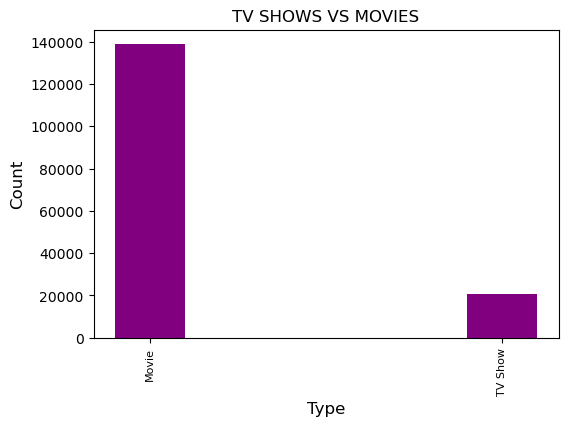

In [122]:
#Graphical

plt.figure(figsize=[6,4])
plt.bar(x,y,width=0.2,color="purple")
plt.xticks(rotation = 90, fontsize = 8)
plt.xlabel("Type",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("TV SHOWS VS MOVIES")
plt.show()

In [123]:
df1["type"].value_counts()

Movie      138800
TV Show     20727
Name: type, dtype: int64

In [124]:
df1["director"].value_counts()

Hayato Date        1846
Shin Won-ho        1320
Felipe Cano         744
Kenny Ortega        646
Hsu Fu-chun         612
                   ... 
Milton Horowitz       1
Matthew Cooke         1
Max Amini             1
Jason Orley           1
Ben Simms             1
Name: director, Length: 4420, dtype: int64

In [125]:
df1["country"].value_counts()

United States     42036
India             22090
United Kingdom     7925
 United States     7720
Japan              5126
                  ...  
 Panama               2
 Sri Lanka            2
 Afghanistan          2
Venezuela             2
 Nicaragua            1
Name: country, Length: 175, dtype: int64

In [126]:
df1["listed_in"].value_counts()

 International Movies    25411
Dramas                   19022
Comedies                 13344
Action & Adventure       11834
 Dramas                   9876
                         ...  
Classic & Cult TV           18
 Reality TV                 15
Romantic TV Shows           11
 Science & Nature TV        11
LGBTQ Movies                 5
Name: listed_in, Length: 70, dtype: int64

## - Comparison of tv shows vs. movies¶

Q2: _How many movies and shows are in the dataset? Show with the bar graph_.

In [127]:
df1["type"].value_counts()

Movie      138800
TV Show     20727
Name: type, dtype: int64

Text(0.5, 1.0, 'TV SHOWS VS MOVIES')

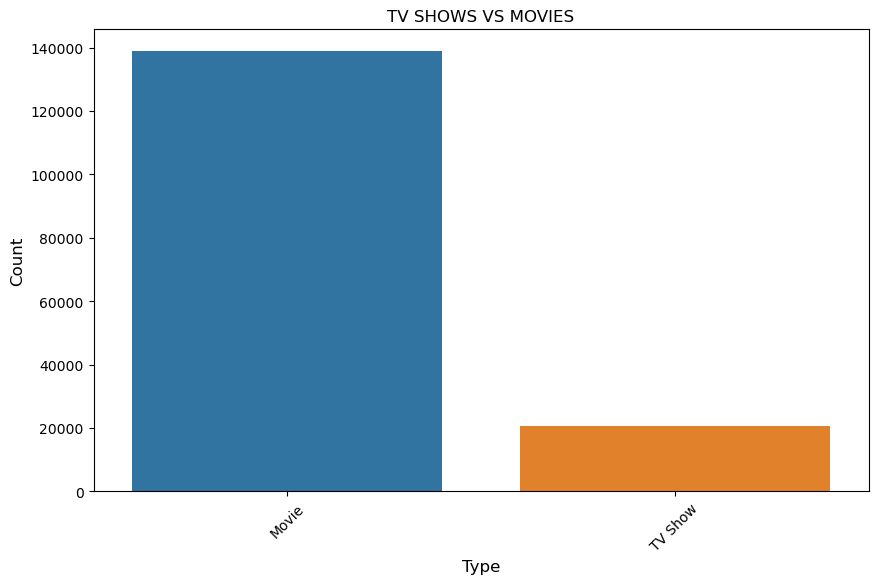

In [128]:
#USING SEABORN
plt.figure(figsize=[10,6])
sns.countplot(data=df1,
              x="type"),

       
plt.xticks(rotation=45,fontsize=10)
plt.xlabel("Type",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.title("TV SHOWS VS MOVIES")

## Business Insights
 - We can clearly see that Movies are the released in huge numbers than TV Shows which indicates that audience enjoy movies than TV Shows may be due to the less duration in movies 
 
## Recommendations
 - We should add more number of TV Shows to the platform to increase its viewership as well
 - More and more movies can be released as it has high audience

Q3: _What type of content is available in various countries?_.

In [130]:
countries=df1["country"].value_counts().head(10)
countries=countries.reset_index()
countries["index"]

0     United States
1             India
2    United Kingdom
3     United States
4             Japan
5       South Korea
6             Spain
7            France
8            France
9            Canada
Name: index, dtype: object

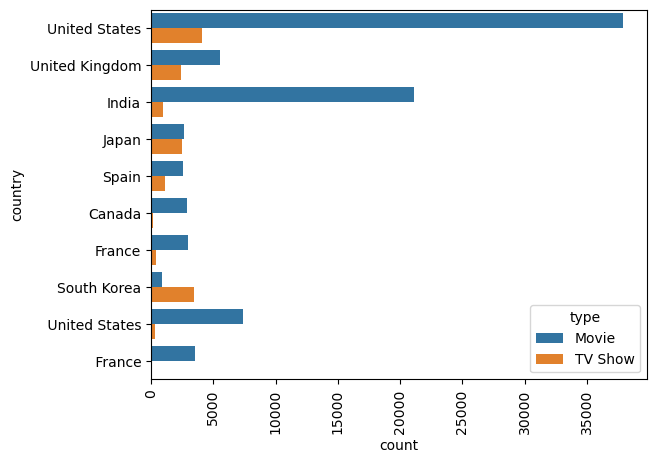

In [163]:
data=df1[df1["country"].isin(countries["index"])]

sns.countplot(data=data,y="country",hue="type")
plt.xticks(rotation=90)
plt.show()

## Business Insights
 - After analysing the top 10 countries,the Dodged bar chart shows that US and India tops the market for Movies.
 - US tops the market for TV Shows .
 -Compared to other European counties UK holds the top markets for both movies and TV Shows.
 -There are hardly any TV Shows coming from Canada and France
 -Japan and South Korea has more viewership in TV Shows than in Movies.

## Recommendations
 - In India and US we can increase the number of movies produced per year as it has large audience
 - We can produce more TV Shows in Japan and South Korea as it has more viewers 

Q4: _In which year highest number of TV Shows and Movies were released? Show with bar graph_.


In [132]:
year_counts=df1["release_year"].value_counts()
year_counts

2018    18652
2017    16737
2016    15411
2019    14901
2020    12236
        ...  
1959       12
1945        8
1947        8
1942        4
1946        2
Name: release_year, Length: 72, dtype: int64

In [133]:
x=year_counts.index
y=year_counts

In [134]:
y_list=list(df1["release_year"].value_counts().index)

In [135]:
df1_sorted=y_list.sort()

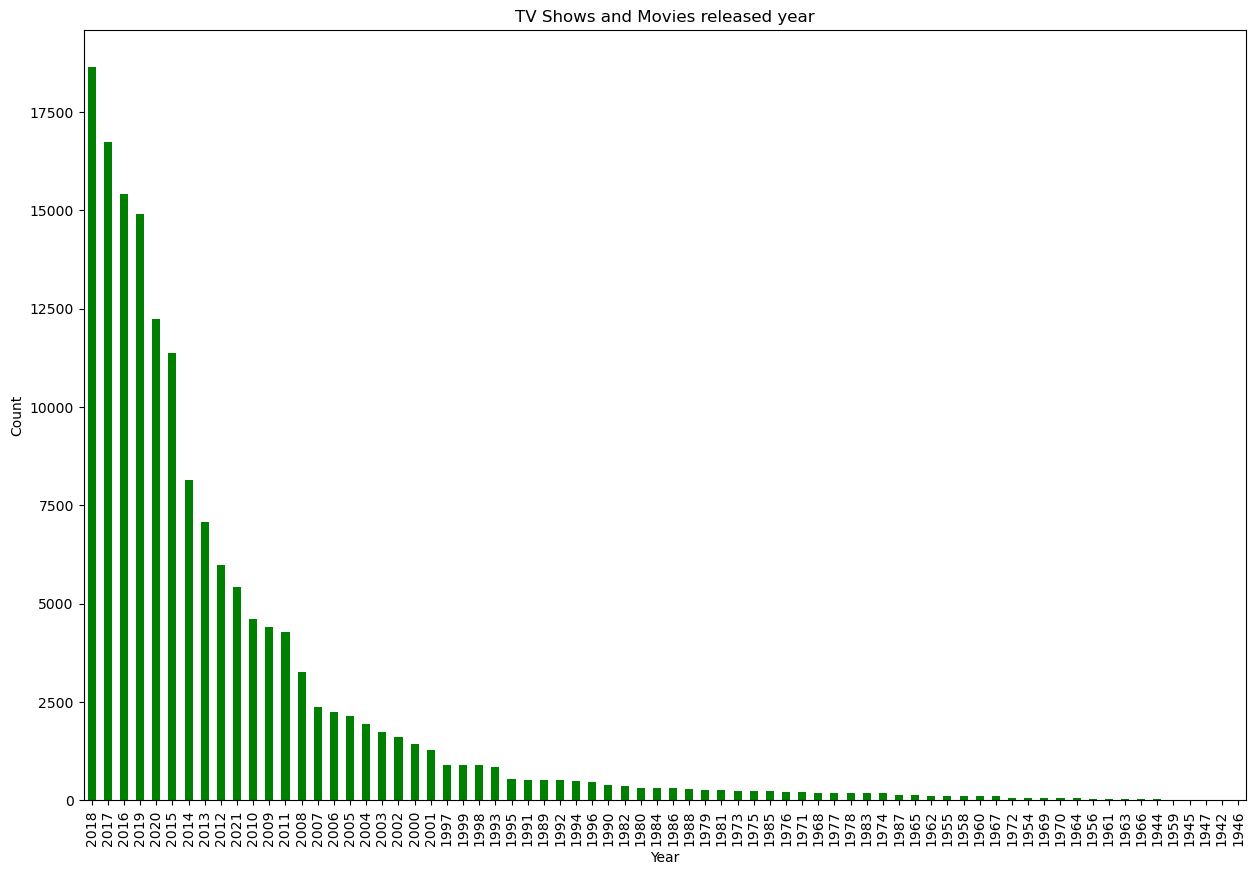

In [136]:
#Show with bar graph

plt.figure(figsize=[15,10])
year_counts.plot(kind="bar",width=0.5,color="green")
plt.xlabel("Year",fontsize=10)
plt.ylabel("Count",fontsize=10)    
plt.title("TV Shows and Movies released year")
plt.show()


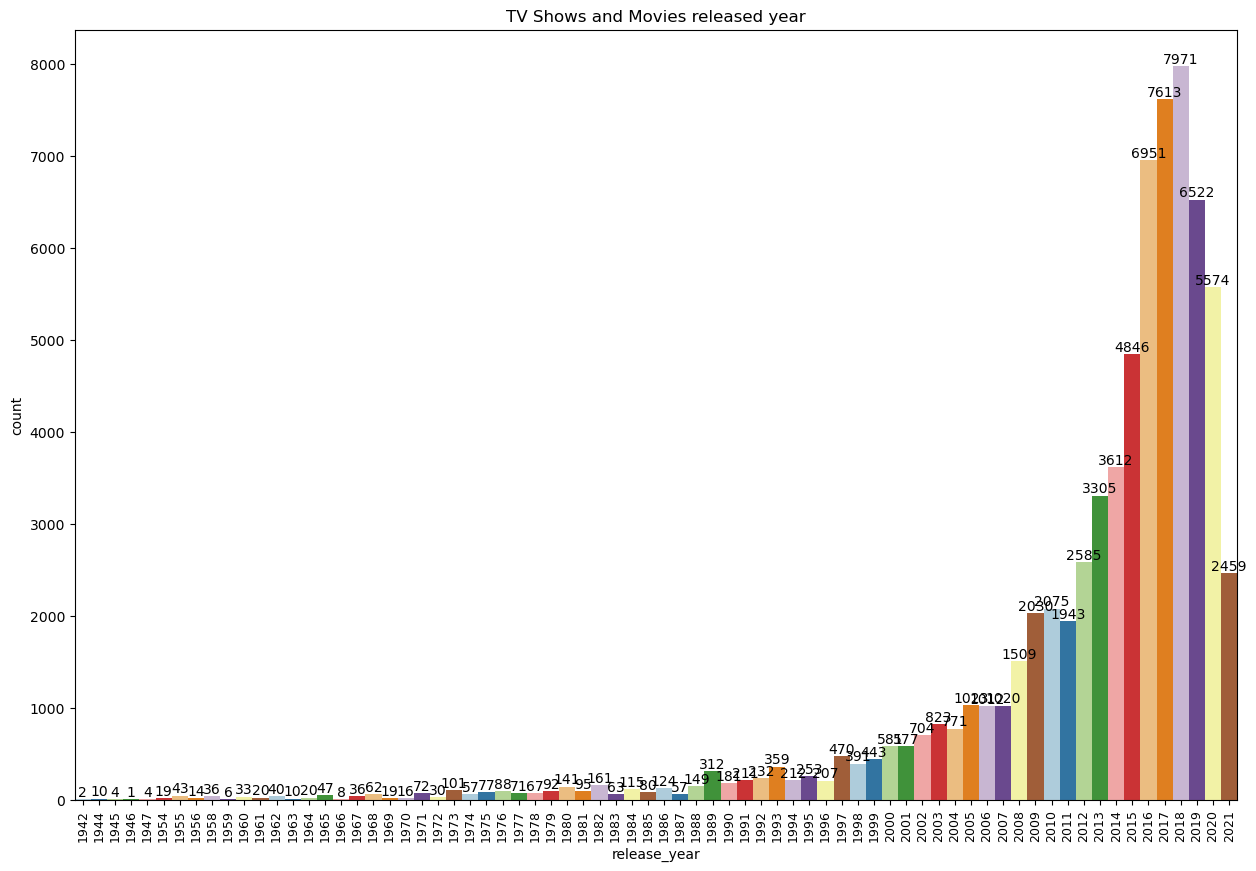

In [78]:
plt.figure (figsize=(15,10))

ax=sns.countplot(data=df1,
              x="release_year",
             order=y_list,
             width=1,
             palette="Paired")

#ax containers

for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation=90,fontsize=9)
plt.title("TV Shows and Movies released year")
plt.show()

## <b> OBSERVATION </b>
 - 2018 HAS HIGHEST NUMBER OF TV SHOWS AND MOVIES RELEASED (COUNT=7971) AND SHOWED THE HIGHEST PEAK FOLLOWING WHICH THERE HAS BEEN A DECREASE IN THE MOVIES AND SHOWS RELEASED




Q5: _Show the top 5 movies released based on their year of release_

In [137]:
movie_data=df1.loc[(df1["type"])=="Movie"]
sorted_movie_data=movie_data.sort_values(["release_year"],ascending=False)
sorted_movie_data.head()

,show_id,type,title,director,listed_in,country,date_added,release_year,rating,duration,description,cast
146362,s769,Movie,Dancing Queens,Helena Bergström,International Movies,Sweden,"June 3, 2021",2021,TV-MA,111 min,A dancer who gets a job cleaning at a struggli...,Christopher Wollter
31600,s271,Movie,Beckett,Ferdinando Cito Filomarino,Action & Adventure,Italy,"August 13, 2021",2021,TV-MA,110 min,An American tourist goes on the run in Greece ...,Lena Kitsopoulou
31621,s308,Movie,Aftermath,Peter Winther,Horror Movies,United States,"August 4, 2021",2021,TV-MA,115 min,"Desperate to save their marriage, a young coup...",Diana Hopper
97203,s878,Movie,Cinema Bandi,Praveen Kandregula,Independent Movies,India,"May 14, 2021",2021,TV-MA,99 min,A struggling rickshaw driver’s life takes a ro...,Munivenkatapa
97202,s874,Movie,Ahaan,Nikhil Pherwani,Independent Movies,India,"May 15, 2021",2021,TV-MA,81 min,"Jilted by his wife, a man with OCD finds eye-o...",Plabita Borthakur


Q6: _Show the top 5 TV Shows released based on their year of release_

In [138]:
tv_show_data=df1.loc[(df1["type"])=="TV Show"]
sorted_tv_show_data=tv_show_data.sort_values(["release_year"],ascending=False)
sorted_tv_show_data.head()

,show_id,type,title,director,listed_in,country,date_added,release_year,rating,duration,description,cast
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,British TV Shows,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,Mel Giedroyc
125664,s1294,TV Show,Pitta Kathalu,Nag Ashwin,TV Dramas,India,"February 19, 2021",2021,TV-MA,1 Season,"From secrets and lies to jealousy and control,...",Uko
121964,s199,TV Show,King of Boys: The Return of the King,Kemi Adetiba,International TV Shows,Nigeria,"August 27, 2021",2021,TV-MA,1 Season,Alhaja Eniola Salami starts anew and sets her ...,Keppy Ekpenyong Bassey
121933,s110,TV Show,La casa de papel,Mateo Gil,International TV Shows,Spain,"September 3, 2021",2021,TV-MA,5 Seasons,Eight thieves take hostages and lock themselve...,Jaime Lorente
121931,s99,TV Show,Octonauts: Above & Beyond,Jani Lachauer,Kids' TV,United Kingdom,"September 7, 2021",2021,TV-Y,1 Season,The Octonauts expand their exploration beyond ...,Helen Walsh


## MOVIES AND TV SHOWS IN INDIA

Q7: _Show only the titles of all the TV Shows that were released in India_.

In [139]:
df1[(df1["type"]=="TV Show") & (df1["country"]=="India")]["title"]

147                                 Navarasa
677                            Bombay Begums
717                            Pitta Kathalu
810       Mighty Little Bheem: Kite Festival
870                          Paava Kadhaigal
                         ...                
150135                           Delhi Crime
152534                                   She
152789                           Delhi Crime
155005                           Delhi Crime
156648                           Delhi Crime
Name: title, Length: 940, dtype: object

Q8: _Show only the titles of all the Movies that were released in India_.

In [140]:
df1[(df1["type"]=="Movie") & (df1["country"]=="India")]["title"]

5                          Jeans
40              Angamaly Diaries
44                        Anjaam
46                        Dhanak
47                       Gurgaon
                   ...          
159243      Haseena Maan Jaayegi
159246                    Pardes
159252    Y.M.I.: Yeh Mera India
159297      Haseena Maan Jaayegi
159300                    Pardes
Name: title, Length: 21150, dtype: object

Q8: _Show the list of Indian movie directors_

In [97]:
movie_directors=df1[(df1["type"]=="Movie") & (df1["country"]=="India")]["director"]

In [93]:
movie_directors

5                  S. Shankar
40       Lijo Jose Pellissery
44               Rahul Rawail
46            Nagesh Kukunoor
47              Shanker Raman
                 ...         
69556            David Dhawan
69566            Subhash Ghai
69582              N. Chandra
69730            David Dhawan
69739            Subhash Ghai
Name: director, Length: 7728, dtype: object

Q9: _Find the number of movies produced in each country and pick the top 10 countries_.

In [141]:
top_movies_country=df1[df1["type"]=="Movie"].groupby("country")["title"].nunique().sort_values(ascending=False)
top_movies_country

country
United States     2143
India              939
 United States     346
United Kingdom     331
Canada             166
                  ... 
Mozambique           1
Namibia              1
 Liechtenstein       1
 Latvia              1
Zimbabwe             1
Name: title, Length: 175, dtype: int64

Q10: _Find the number of Tv-Shows produced in each country and pick the top 10 countries_.

In [142]:
top_TVShows_country=df1[df1["type"]=="TV Show"].groupby("country")["title"].nunique().sort_values(ascending=False)
top_TVShows_country

country
United States      325
United Kingdom     109
South Korea        107
Japan               95
Taiwan              40
Spain               27
India               24
Mexico              19
Turkey              16
France              15
 Canada             12
 United States      10
Thailand             9
Nigeria              7
Canada               6
Brazil               6
Colombia             5
Italy                5
Belgium              4
Poland               4
Denmark              4
Pakistan             3
Australia            2
 Germany             2
 Ireland             2
Philippines          2
 Spain               2
China                2
 France              2
Argentina            2
 South Africa        1
 Japan               1
 Italy               1
 Malaysia            1
 Mexico              1
 United Kingdom      1
Russia               1
Saudi Arabia         1
 Israel              1
 Indonesia           1
 South Korea         1
 Greece              1
 Singapore           1
Nam

## Analysis of actors/directors of different movies and TV Shows

Q11: _The top 10 highest counts of “Movies” by each director_.

In [223]:
top_dir_movies=df1[df1["type"]=="Movie"]
top_dir_movies=top_dir_movies.drop_duplicates(["title","director"])
top_dir_movies["director"].value_counts().head(10)

Raúl Campos            20
Marcus Raboy           20
 Jan Suter             20
Rajiv Chilaka          16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Jay Chapman            12
Steven Spielberg       11
Name: director, dtype: int64

In [ ]:
Q12: _The top 10 highest counts of “TV Shows” by each director_.

In [224]:
top_dir_TVShows=df1[df1["type"]=="TV Show"]
top_dir_TVShows=top_dir_TVShows.drop_duplicates(["title","director"])
top_dir_TVShows["director"].value_counts().head(10)

Hayato Date          70
Ryan Polito          61
Shin Won-ho          60
Michael Simon        52
Kenny Ortega         42
Hsu Fu-chun          31
Daniel Minahan       27
Jay Chandrasekhar    26
Ken Burns            25
Chang-Min Lee        20
Name: director, dtype: int64

## <b> BUSINESS INSIGHTS </b>
 
 - We got the top directors who has directed maximum number of movies and TV shows.
## <b> RECOMMENDATIONS  </b>
 - We should add more movies and TV Shows of the above shows directors and they have received the maximum viewership

 _The top 10 actors who has acted in highest number of movies and TV Shows_.

In [235]:
movies=df1[df1["type"]=="Movie"]
TV=df1[df1["type"]=="TV Show"]

movies=movies.drop_duplicates(["title","cast"])
TV=TV.drop_duplicates(["title","cast"])

In [231]:
movies["cast"].value_counts().head(5)

 Anupam Kher      38
 Om Puri          27
 Paresh Rawal     25
 Boman Irani      25
Shah Rukh Khan    25
Name: cast, dtype: int64

In [236]:
TV["cast"].value_counts().head(10)

 Takahiro Sakurai     15
 Ai Kayano            11
 Junichi Suwabe       11
 Katsuyuki Konishi     9
 Yuki Kaji             9
 Yoshimasa Hosoya      9
 Takehito Koyasu       9
 Daisuke Ono           8
 Kana Hanazawa         8
 Kohsuke Toriumi       8
Name: cast, dtype: int64

## <b> BUSINESS INSIGHTS </b>
 
 - We got the top actors who has acted in more number of movies and TV shows.
## <b> RECOMMENDATIONS  </b>
 - We should add more movies and TV Shows of the above actors since they have received the maximum viewership

Q13: _Which genre of movies are popular in India,USA, and UK_.

In [165]:
ind=df1[df1["country"]=="India"]
genre_ind=ind["listed_in"].value_counts().head(5)
genre_ind=genre_ind.reset_index()
genre_ind.rename(columns={"index":"Genre", "listed_in": "Number of contents"},inplace=True)

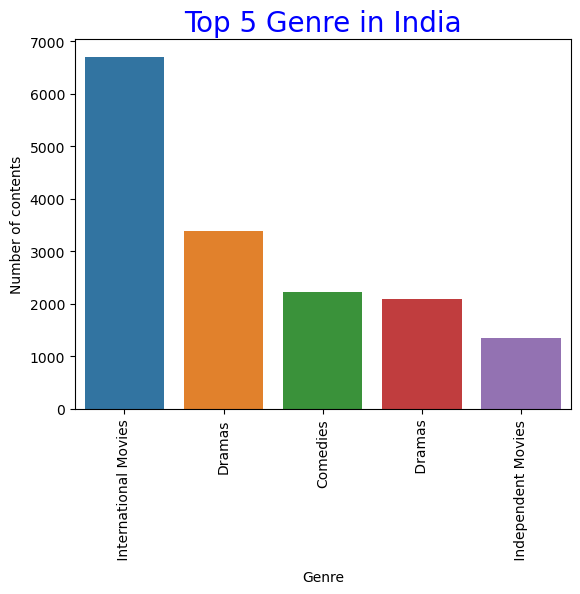

In [164]:
sns.barplot(data=genre_ind, x="Genre",y="Number of contents") #Boxplot
plt.xticks(rotation=90)
plt.title("Top 5 Genre in India",color= "BLUE",fontsize=20)
plt.show()

## <b> OBSERVATION </b>
 - International Movies and Dramas are the most popular genre in India


In [169]:
us=df1[df1["country"]=="United States"]
genre_us=us["listed_in"].value_counts().head(5)
genre_us=genre_us.reset_index()
genre_us.rename(columns={"index":"Genre", "listed_in": "Number of contents"},inplace=True)

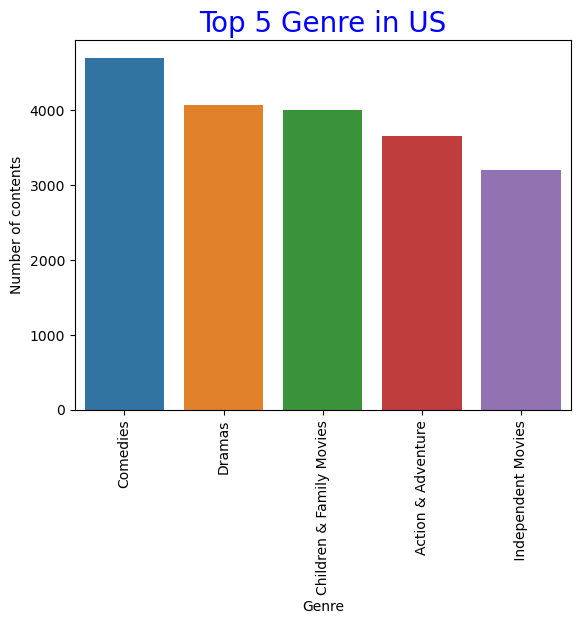

In [170]:
sns.barplot(data=genre_us, x="Genre",y="Number of contents") #Boxplot
plt.xticks(rotation=90)
plt.title("Top 5 Genre in US",color= "BLUE",fontsize=20)
plt.show()

## <b> OBSERVATION </b>
 - Comedies and Dramas Shows are the most popular genre in the US


In [171]:
uk=df1[df1["country"]=="United Kingdom"]
genre_uk=uk["listed_in"].value_counts().head(5)
genre_uk=genre_uk.reset_index()
genre_uk.rename(columns={"index":"Genre", "listed_in": "Number of contents"},inplace=True)

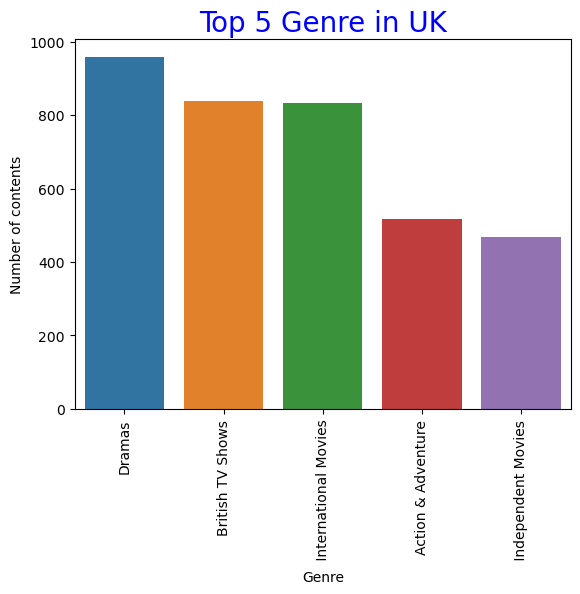

In [172]:
sns.barplot(data=genre_uk, x="Genre",y="Number of contents") #Boxplot
plt.xticks(rotation=90)
plt.title("Top 5 Genre in UK",color= "BLUE",fontsize=20)
plt.show()

## <b> OBSERVATION </b>
 - Dramas and British TV Shows are the most popular genre in the UK


## <b> BUSINESS INSIGHTS </b>
 
 - In India we can see that International movies & Dramas are the most popular genres.
 - In the United States Comedies & Dramas are most popular genre while, independent movies genre is the least popular.
 - In the United Kingdom audience is more into Dramas.

## <b> RECOMMENDATIONS  </b>
 - We should add more contents related to genre like International movies & Dramas in India as Indians are watching more of it.
 - For United States, we should add more comedies & Dramas genre content as compare to other genre.
 - In United Kingdom, similar as US, we should add more content related to genre like Dramas.


Q14: _How has the number of movies released per year changed over last 20-30 years?_.

In [183]:
last30=df2[(df2["release_year"]>1990) & (df2["type"]=="Movie")]

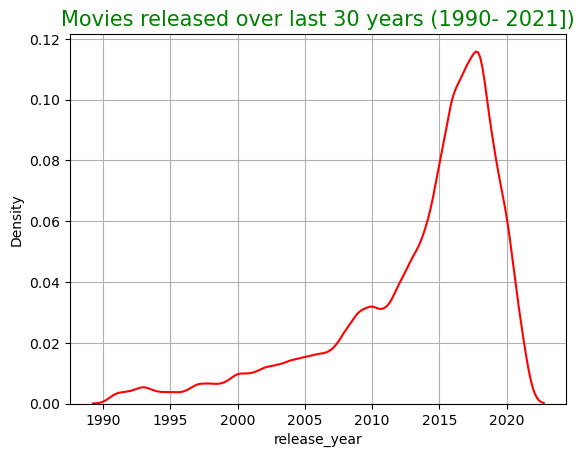

In [185]:
sns.kdeplot(data = last30, x = "release_year", color="red")
plt.title("Movies released over last 30 years (1990- 2021])",color="green",fontsize=15)
plt.grid()
plt.show()

## <b> OBSERVATION </b>
 - After analyzing the graph of last 30 years, we can say that from 2011 to 2018 number of movies released in a huge number. While, we
can also notice that there is a sudden decrement in release after 2018-19 and that could be due to the Covid-19 disease.




Q14: _What is the best time to launch TV Shows?_.

In [214]:
df2 = df1
df2['month'] = pd.to_datetime(df2['date_added']).dt.month_name()


In [215]:
df2.head(5)

,show_id,type,title,director,listed_in,country,date_added,release_year,rating,duration,description,cast,month
0,s8,Movie,Sankofa,Haile Gerima,Dramas,United States,"September 24, 2021",1993,TV-MA,125 min,"On a photo shoot in Ghana, an American model s...",Kofi Ghanaba,September
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,British TV Shows,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,Mel Giedroyc,September
2,s10,Movie,The Starling,Theodore Melfi,Comedies,United States,"September 24, 2021",2021,PG-13,104 min,A woman adjusting to life after a loss contend...,Melissa McCarthy,September
3,s13,Movie,Je Suis Karl,Christian Schwochow,Dramas,Germany,"September 23, 2021",2021,TV-MA,127 min,After most of her family is murdered in a terr...,Luna Wedler,September
4,s16,TV Show,Dear White People,Jay Chandrasekhar,TV Comedies,United States,"September 22, 2021",2021,TV-MA,4 Seasons,Students of color navigate the daily slights a...,Logan Browning,September


In [189]:
tv_show_counts = df2[df2["type"] == 'TV Show'].groupby(["month"])["title"].count()

In [190]:
tv_show_counts

month
1     1691
2     1815
3     1581
4     1328
5     1614
6     2343
7     1486
8     1933
9     1392
10    1576
11    1477
12    2491
Name: title, dtype: int64

In [192]:
Movie_counts = df2[df2["type"] == 'Movie'].groupby(["month"])["title"].count()
Movie_counts

month
1     13584
2      8837
3     11110
4     11949
5      8836
6     10697
7     13789
8     11145
9     12514
10    13235
11    10837
12    12267
Name: title, dtype: int64

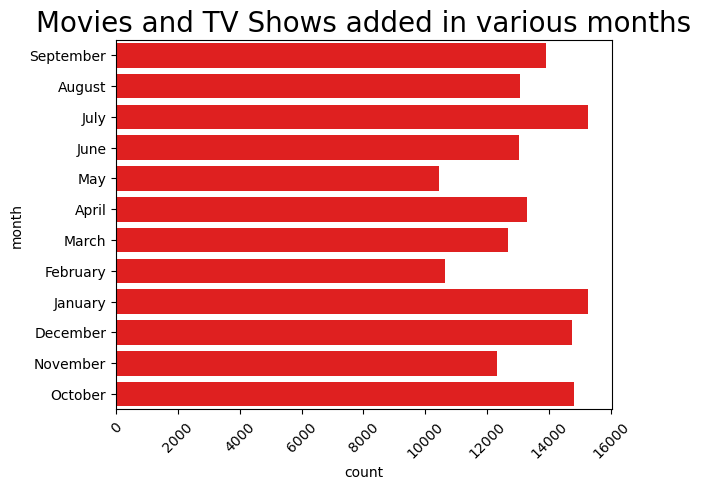

In [216]:
data=df2['month']
data=data.reset_index()

sns.countplot(data=data,y=df2['month'],color="red")
plt.title("Movies and TV Shows added in various months",fontsize=20)
plt.xticks(rotation=45)
plt.show()

## <b> BUSINESS INSIGHTS </b>
  -July and January are the best time to launch a TV show or movies, after that October,December can be considered as best time.
 

## <b> RECOMMENDATIONS  </b>
 -We should release majorly of the content during July, December, October and January month.

## Rating of Movies and TV Shows in United States

In [239]:
movies_us=df1[(df1["type"]=="Movie") & (df1["country"]=="United States")]
tv_us=df1[(df1["type"]=="TV Show") & (df1["country"]=="United States")]


movies_us=movies_us.drop_duplicates(["title"])
tv_us=tv_us.drop_duplicates(["title"])

In [240]:
movies_us["rating"].value_counts().head(5)

TV-MA    560
R        529
PG-13    354
PG       207
TV-14    177
Name: rating, dtype: int64

In [241]:
tv_us["rating"].value_counts().head(5)

TV-MA    136
TV-14     87
TV-PG     51
TV-G      23
TV-Y7     18
Name: rating, dtype: int64

## <b> BUSINESS INSIGHTS </b>
 -We have extracted the top rating category who have the maximum number of movies in the US market.
 
## <b> RECOMMENDATIONS  </b>
 -We should add more movies related to above mentioned rating category as it will going to add more viewership on our portal.


### TOP 10 POPULAR TV SHOWS

In [244]:
TV=df1[df1["type"]=="TV Show"]
TV=TV.drop_duplicates(["title"])
TV[["title","duration"]].sort_values(by="duration",ascending=False).head(10).reset_index(drop=True)

,title,duration
0,The Great British Baking Show,9 Seasons
1,Saved by the Bell,9 Seasons
2,Call the Midwife,9 Seasons
3,Naruto,9 Seasons
4,The Office (U.S.),9 Seasons
5,American Horror Story,9 Seasons
6,Trolls: The Beat Goes On!,8 Seasons
7,Dexter,8 Seasons
8,Girlfriends,8 Seasons
9,Arrow,8 Seasons


## <b> BUSINESS INSIGHTS </b>
 -We have extracted the top 10 popular TV Shows
## <b> RECOMMENDATIONS  </b>
 -As these shows are huge hit ,we should make their next seasons as well due to their high popularity and viewership

## Does Netflix has more focus on TV Shows than movies in recent years


In [246]:
df2 = df1
df2['Year'] = pd.to_datetime(df2['date_added']).dt.year


In [247]:
df3= df3[(df3["Year"] >= 2015) & (df2["Year"] <= 2021)]
recent_TVshow_count = df3[df3["type"] == 'TV Show'].groupby("Year")["title"].count()
recent_Movie_count = df3[df3["type"] == 'Movie'].groupby("Year")["title"].count()


In [248]:
recent_TVshow_count

Year
2015     172
2016    1401
2017    2917
2018    2629
2019    4901
2020    5548
2021    3103
Name: title, dtype: int64

In [249]:
recent_Movie_count

Year
2015     1062
2016     4687
2017    17838
2018    27551
2019    33284
2020    31598
2021    21827
Name: title, dtype: int64

      ***** THANK YOU *****